## Observations and Insights 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_df= pd.merge(mouse_metadata, study_results, on="Mouse ID",how="inner")


# Display the data table for preview
combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Checking the number of mice.
len(combine_df["Mouse ID"]. unique())


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=combine_df.loc[combine_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"]
duplicate_mouse=duplicate_mouse.unique()
duplicate_mouse


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combine_df[combine_df["Mouse ID"].isin(duplicate_mouse)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"]. unique())


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_drug=clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_drug=clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_drug=clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_drug=clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_drug=clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_df=pd.DataFrame({"mean":mean_drug,"median":median_drug,"var":var_drug,"std":std_drug,"sem":sem_drug})
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

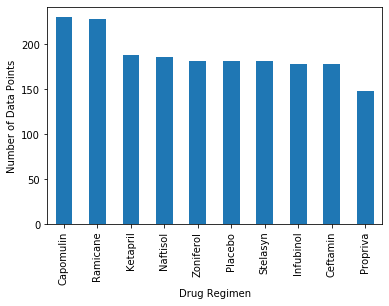

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
counts=clean_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()


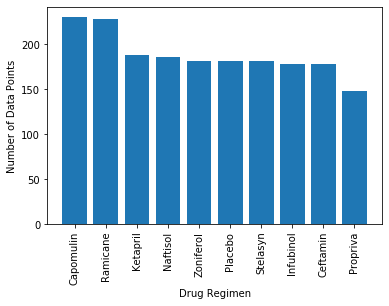

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(counts.index,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()


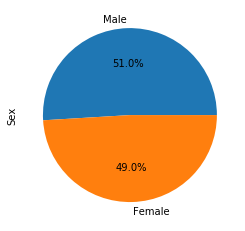

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using p
counts=clean_df['Sex'].value_counts()
count=clean_df['Sex'].value_counts()
count
counts.plot(kind="pie",autopct="%1.1f%%")




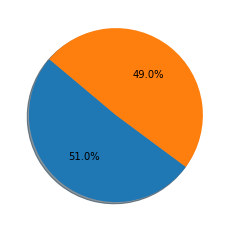

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts,autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
greatest = clean_df.groupby("Mouse ID")["Timepoint"].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = clean_df.merge(greatest,on=["Mouse ID","Timepoint"],how="inner")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset     
    # Determine outliers using upper and lower bounds

treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
data_tumor =[]
    
for name in treatments:
    final_vol = merge_df.loc[merge_df["Drug Regimen"]== name, "Tumor Volume (mm3)"]                  
    data_tumor.append(final_vol)
#   print(f"{name}'s final volume: {data_tumor}")   
    
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_vol.loc[(final_vol < lower_bound) | (final_vol > upper_bound)]
    print(f"The {name}'s potential outliers: {outliers}")

The Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
The Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


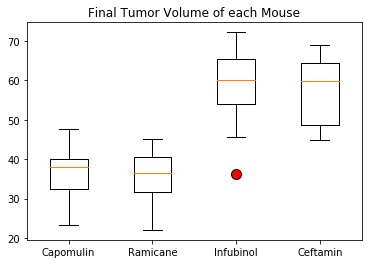

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(data_tumor,labels=treatments,flierprops={'markerfacecolor':'red','markersize':10})
plt.title ('Final Tumor Volume of each Mouse')
plt.show()

## Line and Scatter Plots

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_plot_df = clean_df.loc[clean_df["Mouse ID"] == "l509"]
line_plot_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


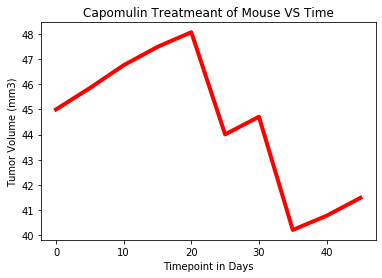

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis_tp = line_plot_df["Timepoint"]
tum_vol = line_plot_df["Tumor Volume (mm3)"]

plt.plot(x_axis_tp, tum_vol, color = 'red', linewidth = 4)
plt.title('Capomulin Treatmeant of Mouse VS Time')
plt.xlabel('Timepoint in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

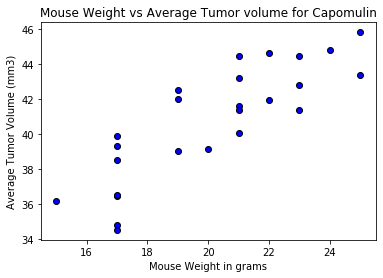

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin'] 
cap_avg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'], facecolors = "blue", edgecolors ="black", alpha = 1)
plt.title ('Mouse Weight vs Average Tumor volume for Capomulin')
plt.xlabel('Mouse Weight in grams')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and average tumor volume is 0.84


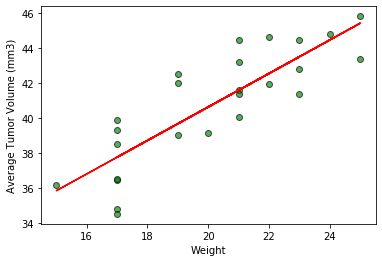

In [46]:
x_values = cap_avg['Weight (g)']
y_values = cap_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values,facecolors = "green", edgecolors ="black", alpha = 0.65)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()